In [1]:
import pandas as pd

In [12]:
# from Baseball Savant, get pitches thrown using TY and LY data
# min pa = 50
def read_pt(year):
    df = pd.read_csv(f'Pitches Thrown {year - 1}-{year}.csv', index_col=False).drop('Unnamed: 7', axis=1)

    # for LY data, give it half-weight
    df.loc[df['year'] < year, 'p_game'] /= 2
    df.loc[df['year'] < year, 'p_total_pitches'] /= 2
    
    # calculate the weighted launch angle
    df_grouped = df.groupby(['player_id']).sum()
    df_grouped['P/G'] = df_grouped['p_total_pitches'] / df_grouped['p_game']
    df_grouped = df_grouped[df_grouped['year'] >= year]
    
    # join with player ids
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['MLBID', 'PLAYERNAME']].set_index('MLBID')
    merge = df_grouped[['P/G']].merge(player_map, how='left', left_index=True, right_index=True)[['PLAYERNAME', 'P/G']]
    
    mean = merge['P/G'].mean()
    std = merge['P/G'].std()
    
    merge['Z'] = (merge['P/G'] - mean) / std
    
    return merge

pt_data = read_pt(2022)
pt_data.head()

,PLAYERNAME,P/G,Z
425794,Adam Wainwright,97.229167,1.551356
425844,Zack Greinke,86.841463,1.224637
434378,Justin Verlander,93.107143,1.421708
434671,Anibal Sanchez,88.000000,1.261076
445276,Kenley Jansen,15.492462,-1.019469


In [13]:
pt_data.sort_values('P/G')

,PLAYERNAME,P/G,Z
573009,NaN,12.015385,-1.128832
641835,Tim Mayza,12.315508,-1.119393
542947,Richard Bleier,12.477528,-1.114297
661403,Emmanuel Clase,12.884444,-1.101498
657612,Tim Hill,13.037234,-1.096692
...,...,...,...
669203,Corbin Burnes,97.255319,1.552179
621121,Lance McCullers,97.863636,1.571312
622491,Luis Castillo,98.506024,1.591517
645261,Sandy Alcantara,98.876289,1.603162


In [15]:
(1.611313 - -1.119393) / (188-37)

0.018084145695364238

-1.1288321977953126
1.6113125712029719
0.01814665409932639


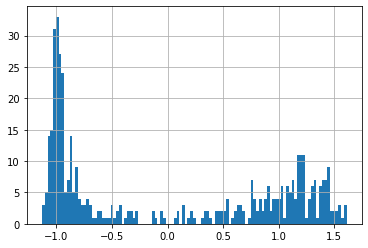

In [17]:
print(pt_data['Z'].min())
print(pt_data['Z'].max())
print((pt_data['Z'].max() - pt_data['Z'].min()) / (188-37))
hist = pt_data['Z'].hist(bins=111)

In [23]:
def get_stam(pg):
    i = 0
    while i < 151:
        floor = -1.1288 + (i * 0.018)
        if pg > floor:
            i += 1
        else:
            break
    return 37 + i

In [25]:
def assign_stam(year):
    stam_data = read_pt(2022)
    stam_data['Stamina'] = stam_data.apply(lambda x: get_stam(x['Z']), axis=1)
    return stam_data[['PLAYERNAME', 'Stamina']].dropna()

stam_df = assign_stam(2022)
stam_df.head()

,PLAYERNAME,Stamina
425794,Adam Wainwright,186
425844,Zack Greinke,168
434378,Justin Verlander,179
434671,Anibal Sanchez,170
445276,Kenley Jansen,44


In [27]:
stam_df.sort_values('Stamina', ascending=False).head(20)

,PLAYERNAME,Stamina
645261,Sandy Alcantara,188
622491,Luis Castillo,188
543037,Gerrit Cole,188
621121,Lance McCullers,188
425794,Adam Wainwright,186
669203,Corbin Burnes,186
506433,Yu Darvish,186
664285,Framber Valdez,186
592662,Robbie Ray,185
656302,Dylan Cease,184


In [28]:
stam_df.to_csv('2022_Stamina.csv')